# Import Dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv("diabetes_prediction_dataset.csv")
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [5]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,100000.0,41.885856,22.516840,0.08,24.00,43.00,60.00,80.00
hypertension,100000.0,0.074850,0.263150,0.00,0.00,0.00,0.00,1.00
heart_disease,100000.0,0.039420,0.194593,0.00,0.00,0.00,0.00,1.00
bmi,100000.0,27.320767,6.636783,10.01,23.63,27.32,29.58,95.69
HbA1c_level,100000.0,5.527507,1.070672,3.50,4.80,5.80,6.20,9.00
blood_glucose_level,100000.0,138.058060,40.708136,80.00,100.00,140.00,159.00,300.00
diabetes,100000.0,0.085000,0.278883,0.00,0.00,0.00,0.00,1.00


In [8]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


# Data Visualization

AttributeError: 'QuadMesh' object has no property 'fontsize'

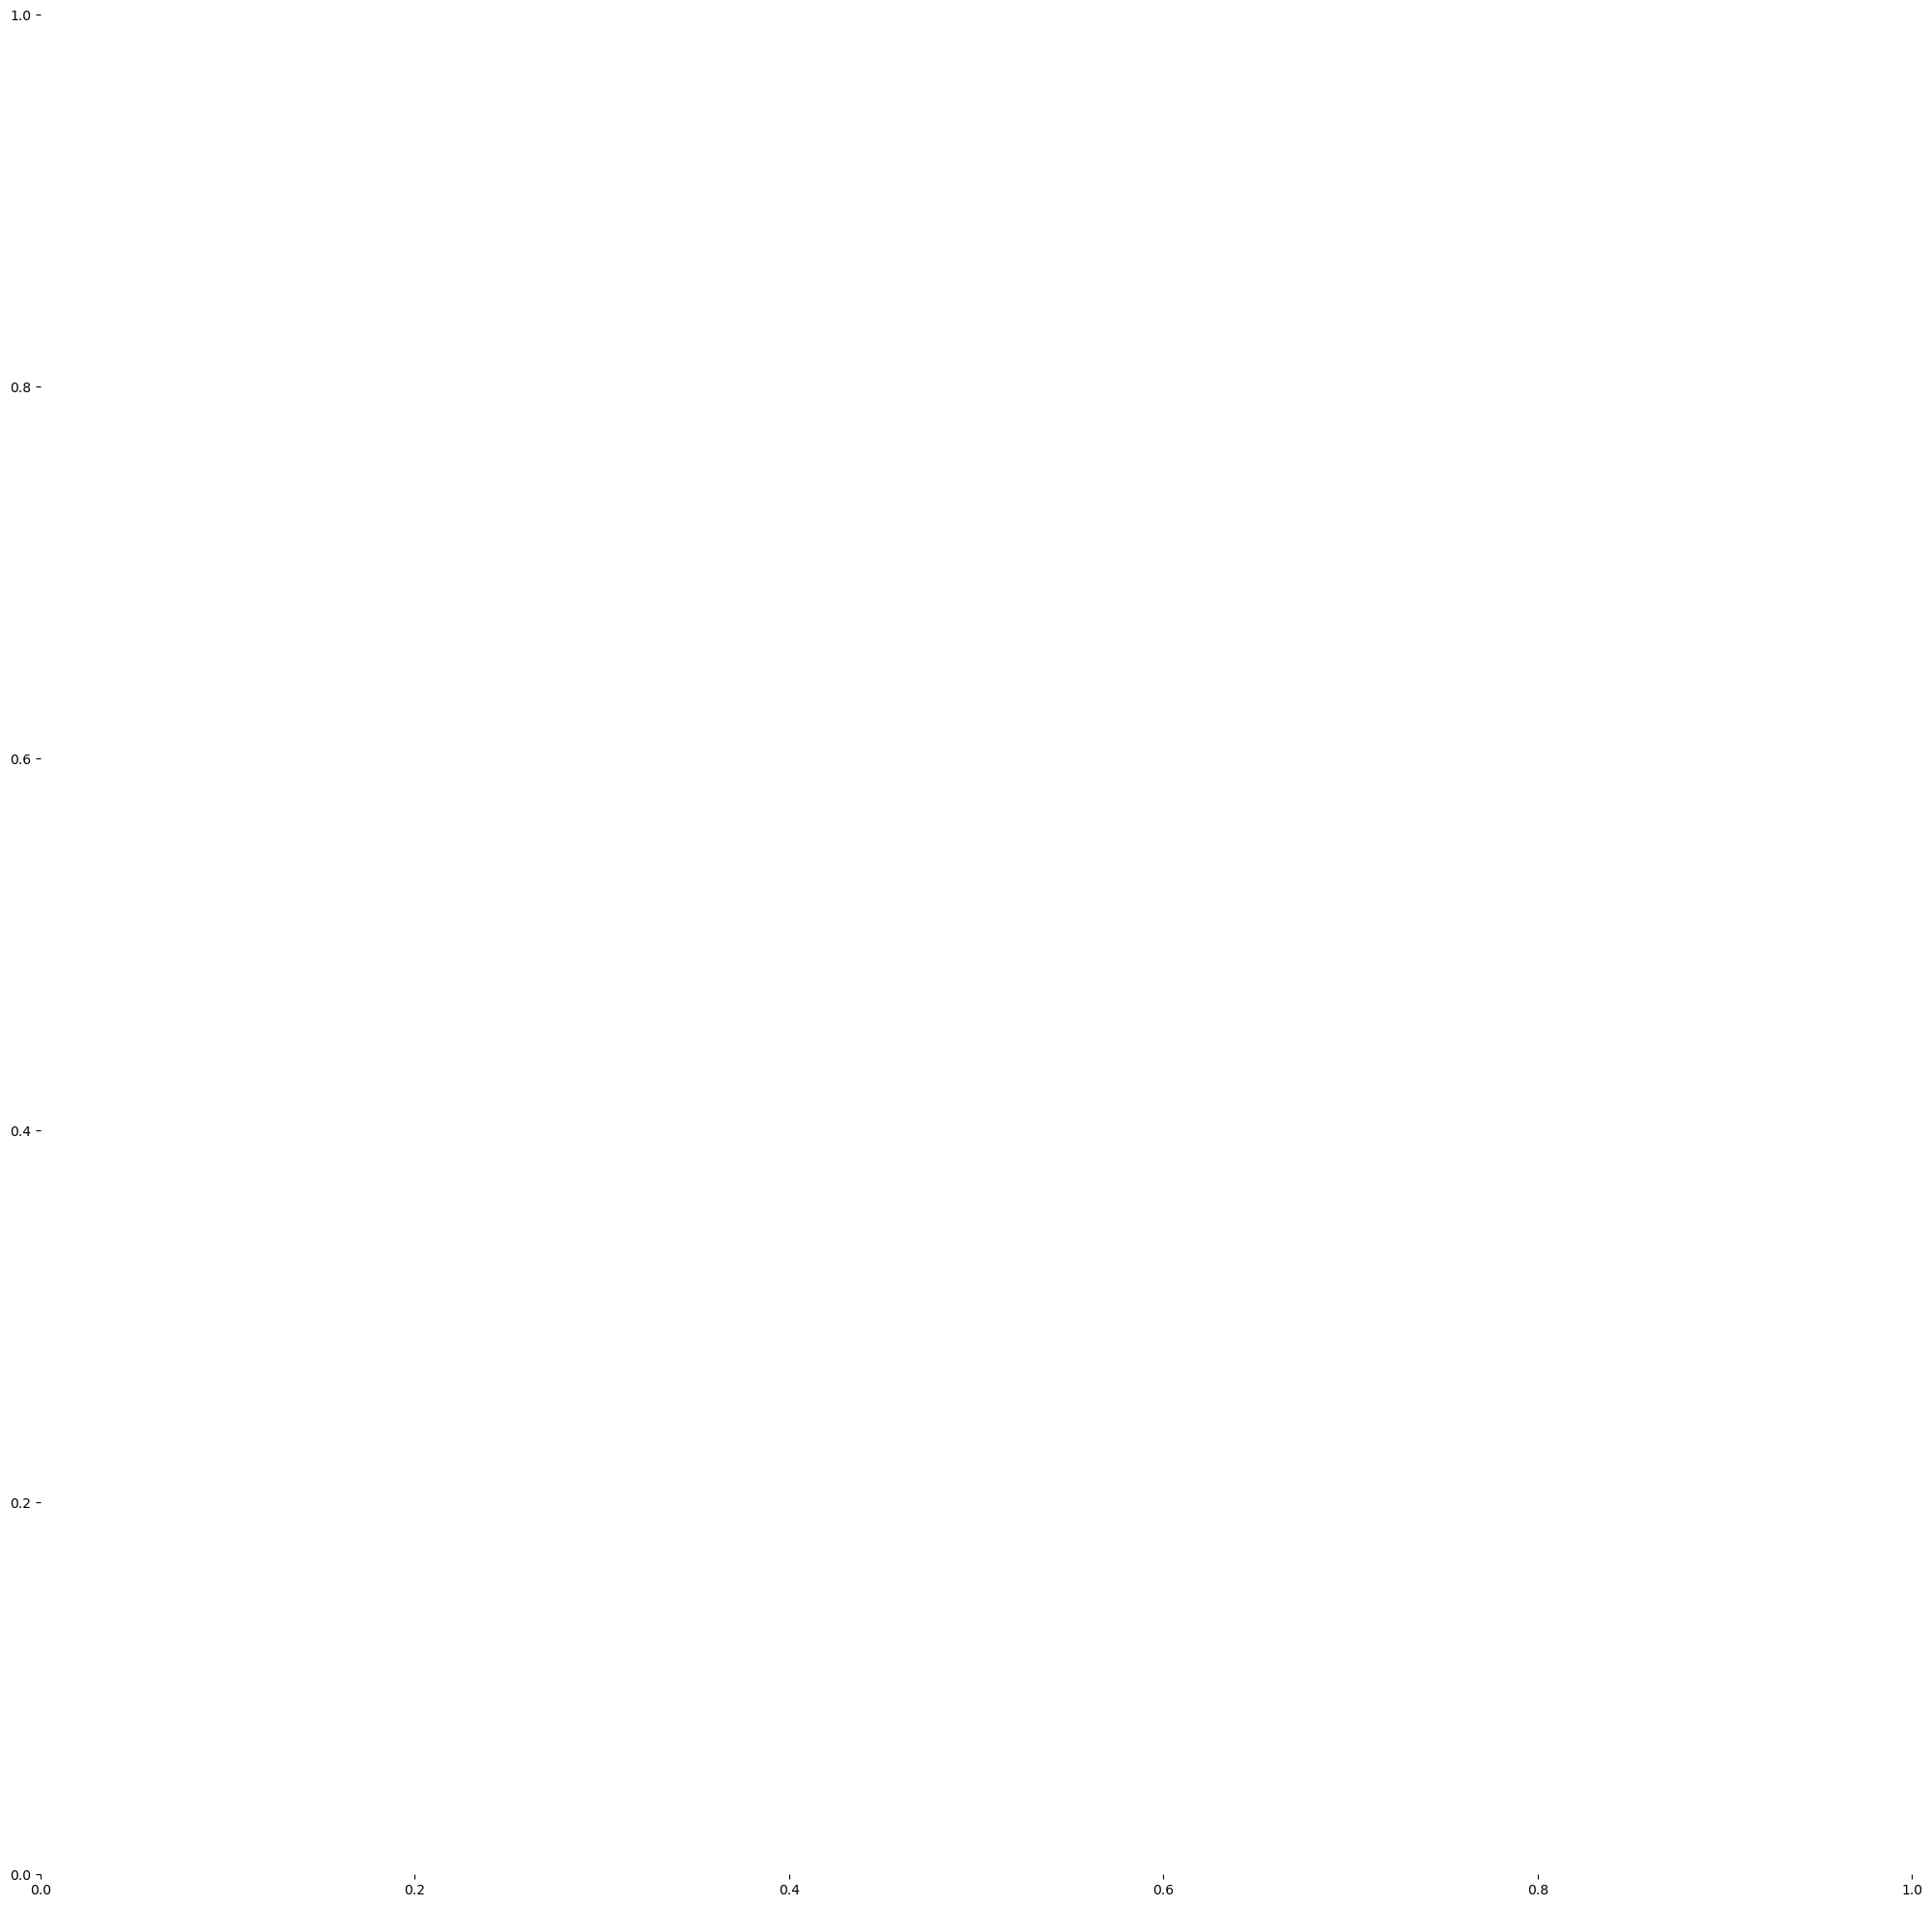

In [11]:
#Korelasi tiap kolom
corr=df.corr()
plt.figure(figsize=(25, 25))
sns.heatmap(corr,cmap='Blues', annot=True)

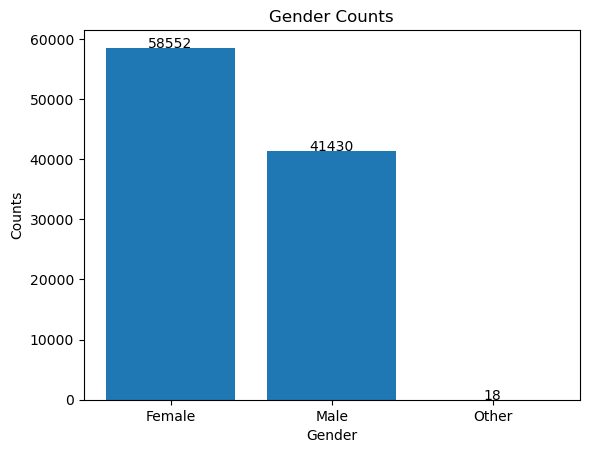

In [178]:
gender=df.gender.unique()
gender_count=df.gender.value_counts()
plt.bar(gender, gender_count, bottom=np.zeros(3))

for i, v in enumerate(gender_count):
    plt.text(i, v + 50, str(v), ha='center')

plt.title('Gender Counts')
plt.ylabel('Counts')             
plt.xlabel('Gender')
plt.show()

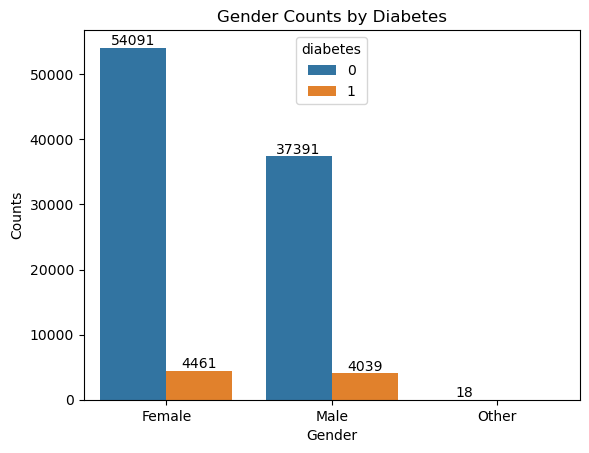

In [179]:
ax=sns.countplot(x='gender',hue='diabetes', data=df)
for container in ax.containers:
    plt.bar_label(container, fmt='%.0f')
plt.title('Gender Counts by Diabetes')
plt.ylabel('Counts')             
plt.xlabel('Gender')
plt.show()

Gender='other' dapat dihilangkan karena dapat dianggap bias oleh decision tree. (Jika gender=='Other', tidak terindikasi terkena diabetes)

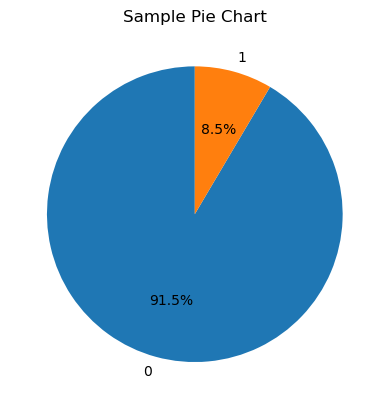

In [180]:
labels = df.diabetes.unique()
sizes = df.diabetes.value_counts()

# Create a pie plot
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

# Set plot title
ax.set_title('Sample Pie Chart')

# Show the plot
plt.show()

Data tidak seimbang sehingga perlu didownsampling

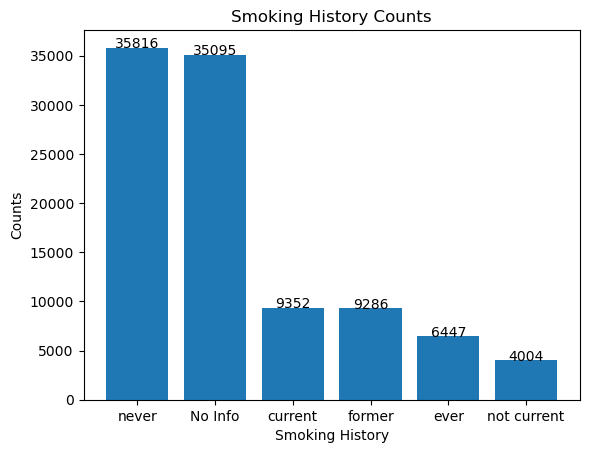

In [181]:
smoking_history=df.smoking_history.unique()
smoking_history_count=df.smoking_history.value_counts()
plt.bar(smoking_history, smoking_history_count)

for i, v in enumerate(smoking_history_count):
    plt.text(i, v + 1, str(v), ha='center')

plt.title('Smoking History Counts')
plt.ylabel('Counts')             
plt.xlabel('Smoking History')
plt.show()

<AxesSubplot:xlabel='age', ylabel='Count'>

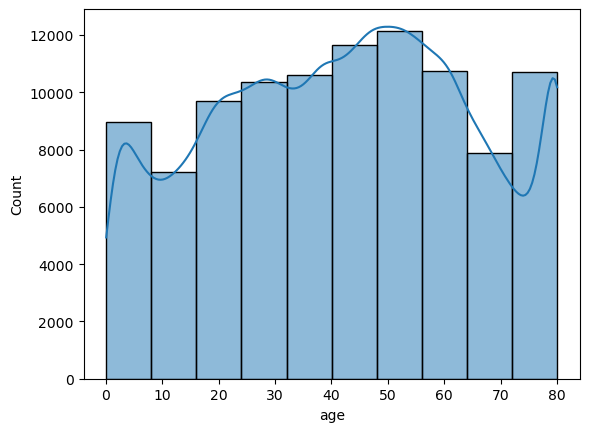

In [182]:
sns.histplot(data=df,x='age',kde=True, bins=10)

In [183]:
# Check for duplicates
df[df.duplicated()==True]

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
2756,Male,80.0,0,0,No Info,27.32,6.6,159,0
3272,Female,80.0,0,0,No Info,27.32,3.5,80,0
3418,Female,19.0,0,0,No Info,27.32,6.5,100,0
3939,Female,78.0,1,0,former,27.32,3.5,130,0
3960,Male,47.0,0,0,No Info,27.32,6.0,200,0
...,...,...,...,...,...,...,...,...,...
99980,Female,52.0,0,0,never,27.32,6.1,145,0
99985,Male,25.0,0,0,No Info,27.32,5.8,145,0
99989,Female,26.0,0,0,No Info,27.32,5.0,158,0
99990,Male,39.0,0,0,No Info,27.32,6.1,100,0


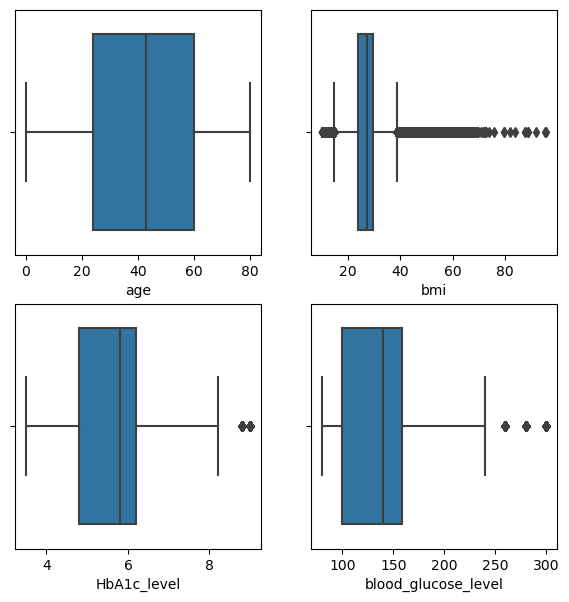

In [184]:
fig, axs = plt.subplots(2, 2, figsize=(7, 7))

sns.boxplot(data=df, x='age', ax=axs[0, 0])
sns.boxplot(data=df, x='bmi', ax=axs[0, 1])
sns.boxplot(data=df, x='HbA1c_level', ax=axs[1, 0])
sns.boxplot(data=df, x='blood_glucose_level', ax=axs[1, 1])

plt.show()

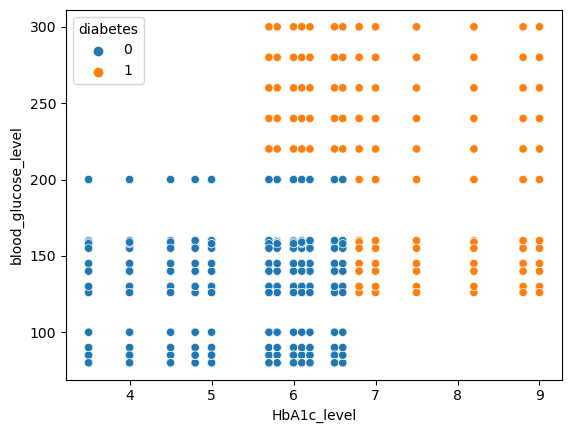

In [185]:
sns.scatterplot(y='blood_glucose_level', x='HbA1c_level', hue='diabetes', data=df)
plt.show()

# Preprocessing Data and EDA

In [186]:
from sklearn.utils import resample
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [187]:
#Drop data when gender!='Other'
df_updated=df[df.gender!='Other']
df_updated

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [188]:
#Drop Duplicated data
df_cleaned=df_updated.drop_duplicates()
df_cleaned

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99994,Female,36.0,0,0,No Info,24.60,4.8,145,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [189]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96128 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               96128 non-null  object 
 1   age                  96128 non-null  float64
 2   hypertension         96128 non-null  int64  
 3   heart_disease        96128 non-null  int64  
 4   smoking_history      96128 non-null  object 
 5   bmi                  96128 non-null  float64
 6   HbA1c_level          96128 non-null  float64
 7   blood_glucose_level  96128 non-null  int64  
 8   diabetes             96128 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 7.3+ MB


In [190]:
diabetes_dict=dict(df_cleaned['diabetes'].value_counts())
diabetes_dict

{0: 87646, 1: 8482}

In [191]:
df_cleaned_majority = df_cleaned[df_cleaned.diabetes==0]
df_cleaned_minority = df_cleaned[df_cleaned.diabetes==1]

# downsample majority class
df_majority_downsampled = resample(df_cleaned_majority,
                                   replace=False, # sample without replacement
                                   n_samples=len(df_cleaned_minority), # match minority class
                                   random_state=42) # reproducible results

# combine minority class and downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled, df_cleaned_minority])

In [192]:
df_downsampled

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
6341,Male,37.0,0,0,not current,21.64,5.8,145,0
70364,Female,23.0,0,0,never,23.17,6.5,130,0
42389,Male,12.0,0,0,No Info,26.06,4.0,100,0
80735,Female,44.0,0,0,never,21.46,4.0,90,0
22512,Male,80.0,0,1,never,27.32,5.8,200,0
...,...,...,...,...,...,...,...,...,...
99935,Female,65.0,1,1,never,33.55,8.2,140,1
99938,Male,55.0,0,1,former,30.42,6.2,300,1
99957,Female,61.0,0,0,No Info,34.45,6.5,280,1
99962,Female,58.0,1,0,never,38.31,7.0,200,1


In [193]:
df_downsampled.diabetes.value_counts()

0    8482
1    8482
Name: diabetes, dtype: int64

In [194]:
df_downsampled[["gender", "smoking_history"]] = df_downsampled[["gender", "smoking_history"]].apply(LabelEncoder().fit_transform)
df_downsampled

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
6341,1,37.0,0,0,5,21.64,5.8,145,0
70364,0,23.0,0,0,4,23.17,6.5,130,0
42389,1,12.0,0,0,0,26.06,4.0,100,0
80735,0,44.0,0,0,4,21.46,4.0,90,0
22512,1,80.0,0,1,4,27.32,5.8,200,0
...,...,...,...,...,...,...,...,...,...
99935,0,65.0,1,1,4,33.55,8.2,140,1
99938,1,55.0,0,1,3,30.42,6.2,300,1
99957,0,61.0,0,0,0,34.45,6.5,280,1
99962,0,58.0,1,0,4,38.31,7.0,200,1


In [195]:
classification_target = "diabetes"

num_attributes = df_downsampled.drop(['diabetes'], axis=1).columns

In [196]:
# Split data into train and test set
X_data, y_data = df_downsampled[num_attributes], df_downsampled[classification_target]
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = 0.3, stratify=y_data, random_state=24)
#X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.3, stratify=y, random_state=24)

In [205]:
class_label=np.array(['not_diabetes', 'diabetes'])

# Prediction with Decision Tree

In [197]:
from sklearn.metrics import f1_score, accuracy_score, mean_squared_error, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [198]:
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)
y_pred_dt = dt_classifier.predict(X_test)

In [199]:
print("Accuracy Score: ", accuracy_score(y_test, y_pred_dt))
print("Mean Squared Error: ", mean_squared_error(y_test, y_pred_dt))
print("F1 Score: ", f1_score(y_test, y_pred_dt))
print("\n\nClassification Report\n", classification_report(y_test, y_pred_dt))

Accuracy Score:  0.8744597249508841
Mean Squared Error:  0.1255402750491159
F1 Score:  0.8745336736697428


Classification Report
               precision    recall  f1-score   support

           0       0.87      0.87      0.87      2545
           1       0.87      0.88      0.87      2545

    accuracy                           0.87      5090
   macro avg       0.87      0.87      0.87      5090
weighted avg       0.87      0.87      0.87      5090



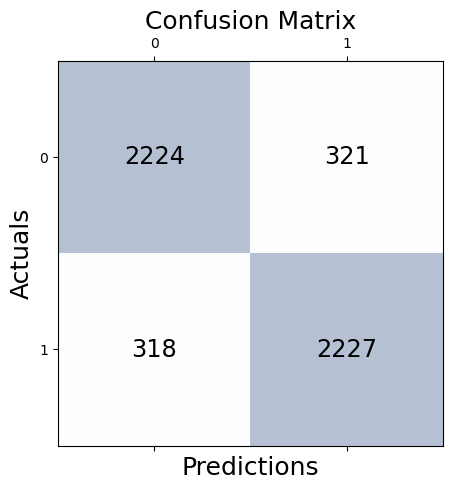

In [200]:
conf_matrix=confusion_matrix(y_test, y_pred_dt)
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

## Hyperparamater Tuning

In [201]:
max_depth = range(1, 15)
max_leaf_nodes = range(10, 100, 5)
for depth in max_depth:
    for leaf in max_leaf_nodes:
        dt = DecisionTreeClassifier(max_depth=depth, max_leaf_nodes=leaf, random_state=24)
        dt.fit(X_train, y_train)

        prediction = dt.predict(X_test)
        print("Depth: {}, Leaf: {}, Acc: {}".format(depth, leaf, accuracy_score(prediction, y_test)))

Depth: 1, Leaf: 10, Acc: 0.7396856581532416
Depth: 1, Leaf: 15, Acc: 0.7396856581532416
Depth: 1, Leaf: 20, Acc: 0.7396856581532416
Depth: 1, Leaf: 25, Acc: 0.7396856581532416
Depth: 1, Leaf: 30, Acc: 0.7396856581532416
Depth: 1, Leaf: 35, Acc: 0.7396856581532416
Depth: 1, Leaf: 40, Acc: 0.7396856581532416
Depth: 1, Leaf: 45, Acc: 0.7396856581532416
Depth: 1, Leaf: 50, Acc: 0.7396856581532416
Depth: 1, Leaf: 55, Acc: 0.7396856581532416
Depth: 1, Leaf: 60, Acc: 0.7396856581532416
Depth: 1, Leaf: 65, Acc: 0.7396856581532416
Depth: 1, Leaf: 70, Acc: 0.7396856581532416
Depth: 1, Leaf: 75, Acc: 0.7396856581532416
Depth: 1, Leaf: 80, Acc: 0.7396856581532416
Depth: 1, Leaf: 85, Acc: 0.7396856581532416
Depth: 1, Leaf: 90, Acc: 0.7396856581532416
Depth: 1, Leaf: 95, Acc: 0.7396856581532416
Depth: 2, Leaf: 10, Acc: 0.8418467583497053
Depth: 2, Leaf: 15, Acc: 0.8418467583497053
Depth: 2, Leaf: 20, Acc: 0.8418467583497053
Depth: 2, Leaf: 25, Acc: 0.8418467583497053
Depth: 2, Leaf: 30, Acc: 0.84184

Depth: 11, Leaf: 65, Acc: 0.9
Depth: 11, Leaf: 70, Acc: 0.899803536345776
Depth: 11, Leaf: 75, Acc: 0.899607072691552
Depth: 11, Leaf: 80, Acc: 0.8982318271119842
Depth: 11, Leaf: 85, Acc: 0.8978388998035364
Depth: 11, Leaf: 90, Acc: 0.8978388998035364
Depth: 11, Leaf: 95, Acc: 0.8976424361493124
Depth: 12, Leaf: 10, Acc: 0.8994106090373281
Depth: 12, Leaf: 15, Acc: 0.9021611001964637
Depth: 12, Leaf: 20, Acc: 0.9017681728880157
Depth: 12, Leaf: 25, Acc: 0.9027504911591355
Depth: 12, Leaf: 30, Acc: 0.9025540275049115
Depth: 12, Leaf: 35, Acc: 0.9005893909626719
Depth: 12, Leaf: 40, Acc: 0.9005893909626719
Depth: 12, Leaf: 45, Acc: 0.9003929273084479
Depth: 12, Leaf: 50, Acc: 0.8974459724950884
Depth: 12, Leaf: 55, Acc: 0.8978388998035364
Depth: 12, Leaf: 60, Acc: 0.8976424361493124
Depth: 12, Leaf: 65, Acc: 0.8966601178781926
Depth: 12, Leaf: 70, Acc: 0.8958742632612967
Depth: 12, Leaf: 75, Acc: 0.8954813359528487
Depth: 12, Leaf: 80, Acc: 0.8952848722986247
Depth: 12, Leaf: 85, Acc: 0

Depth 8 dan leaf 25 memberikan akurasi yang lebih tinggi sekitar 90.47%

In [202]:
dt_tunned=DecisionTreeClassifier(max_depth=10, max_leaf_nodes=25)
dt_tunned.fit(X_train, y_train)
y_tuned_predict=dt_tunned.predict(X_test)

In [203]:
print("Accuracy Score: ", accuracy_score(y_test, y_tuned_predict))
print("Mean Squared Error: ", mean_squared_error(y_test, y_tuned_predict))
print("F1 Score: ", f1_score(y_test, y_tuned_predict))
print("\n\nClassification Report\n", classification_report(y_test, y_tuned_predict))

Accuracy Score:  0.9047151277013753
Mean Squared Error:  0.09528487229862476
F1 Score:  0.9066050452532255


Classification Report
               precision    recall  f1-score   support

           0       0.92      0.88      0.90      2545
           1       0.89      0.92      0.91      2545

    accuracy                           0.90      5090
   macro avg       0.91      0.90      0.90      5090
weighted avg       0.91      0.90      0.90      5090



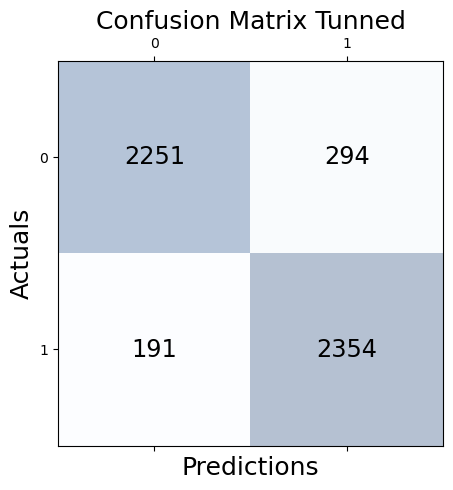

In [204]:
conf_matrix=confusion_matrix(y_test, y_tuned_predict)
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix Tunned', fontsize=18)
plt.show()

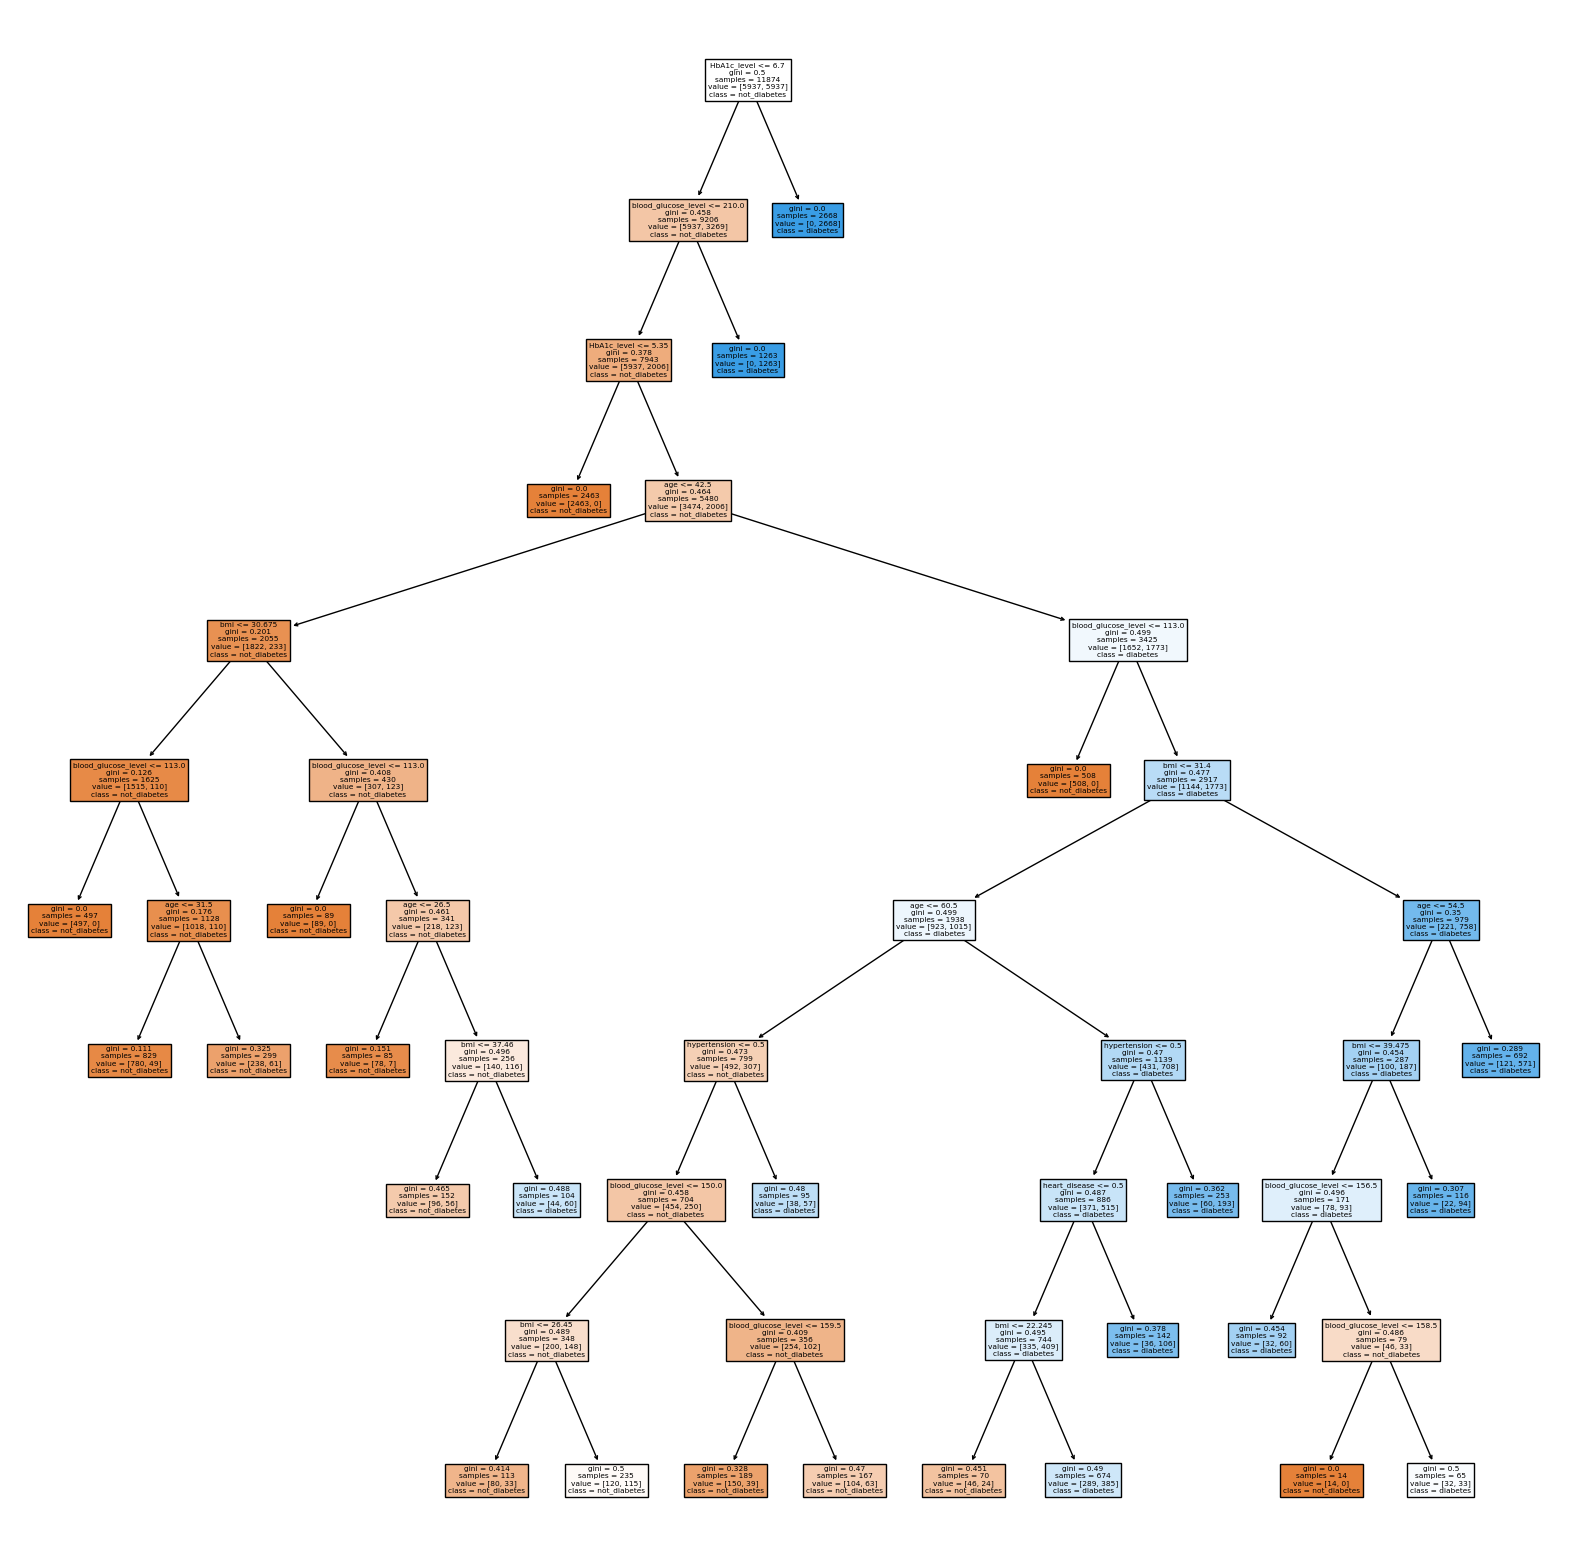

In [214]:
fig,ax=plt.subplots(figsize=(20, 20))
plot_tree(dt_tunned, feature_names=num_attributes, class_names=class_label, filled=True)
plt.show()

In [216]:
fig.savefig('dtree.pdf')

## Bonus: Klasifikasi dengan Regresi Logistik

In [207]:
#Bonus: Logistic Regression
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=300)
lr.fit(X_train, y_train)

prediction_lr = lr.predict(X_test)
print(accuracy_score(prediction_lr, y_test))

0.8850687622789783


In [208]:
print("Accuracy Score: ", accuracy_score(prediction_lr, y_test))
print("Mean Squared Error: ", mean_squared_error(prediction_lr, y_test))
print("F1 Score: ", f1_score(prediction_lr, y_test))
print("\n\nClassification Report\n", classification_report(prediction_lr, y_test))

Accuracy Score:  0.8850687622789783
Mean Squared Error:  0.11493123772102161
F1 Score:  0.885000982897582


Classification Report
               precision    recall  f1-score   support

           0       0.89      0.88      0.89      2548
           1       0.88      0.89      0.89      2542

    accuracy                           0.89      5090
   macro avg       0.89      0.89      0.89      5090
weighted avg       0.89      0.89      0.89      5090



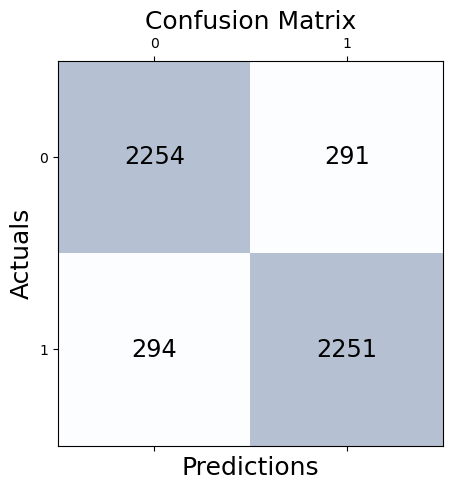

In [209]:
conf_matrix=confusion_matrix(y_test, prediction_lr)
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()